In [623]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='8135tao', api_key='wyGWY4LmNGNohXtJ3vmo')
import plotly.plotly as py
#import requests


In [273]:
total_expo_bystate_df=pd.read_csv('DATA_Exports_of_NAICS_Total_All_Merchandise_to_World.csv')

list_of_state1 = set(total_expo_bystate_df['State'])

total_expo_bystate_df_sorted = total_expo_bystate_df.sort_values(by=['State'])
total_expo_bystate_df_sorted=total_expo_bystate_df_sorted.set_index('State')

len(list_of_state1)


55

In [274]:
total_expo_bystate_df['State']=total_expo_bystate_df['State'].str.lstrip()
total_expo_bystate_df=total_expo_bystate_df.rename(index=str, columns={"State": "state"})
total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,UNITED STATES,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11
2,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11
3,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10
4,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10


In [275]:
df = pd.read_csv("2011_us_ag_exports.csv")
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [276]:
df['state']=df['state'].str.lstrip()


In [277]:
list_of_state2 = set(df['state'])
#list_of_state2

In [422]:
inter_states = list_of_state1&list_of_state2
inter_states

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [423]:
#for state in diff_states:
#    total_expo_bystate_df=total_expo_bystate_df[total_expo_bystate_df.state != state ].reset_index(drop=True)

#gdp_06_17_df=gdp_06_17_df[gdp_06_17_df['Country Name'].isin(intersection) ].reset_index(drop=True)
        
total_expo_bystate_df = total_expo_bystate_df[total_expo_bystate_df['state'].isin(inter_states) ]    

total_expo_bystate_df['mean'] = total_expo_bystate_df.loc[:, '2007':'2016'].mean(axis=1)

total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
0,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11,2.289572e+11
1,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11,1.534451e+11
2,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10,7.823226e+10
3,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10,6.903547e+10
4,Illinois,4.889625e+10,5.367748e+10,4.162611e+10,5.006071e+10,6.490290e+10,6.815788e+10,6.621289e+10,6.839400e+10,6.336869e+10,5.968098e+10,6.518697e+10,5.849779e+10


In [424]:
total_expo_bystate_mean_df = total_expo_bystate_df[['state','mean']]

# cols =total_expo_bystate_mean_df.columns
# print(cols)

#total_expo_bystate_mean_df.columns = total_expo_bystate_mean_df.columns.astype(str)


total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean']/(10**9)


total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['state']).reset_index(drop=True)
total_expo_bystate_mean_df['code'] = df['code']
total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['mean'],ascending=False).reset_index(drop=True)
#total_expo_bystate_mean_df['mean']= total_expo_bystate_mean_df['mean'].map("${:.0f}".format)
total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean'].round(2)

total_expo_bystate_mean_df.to_csv('Mean_total_export_state.csv')
#total_expo_bystate_mean_df['B'] = (total_expo_bystate_mean_df[cols] == 'B').astype(int).sum(axis=1)


C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [425]:
list_of_top_countries = ['United States','Japan','Germany','China','France','United Kingdom','Italy','Russian Federation','Brazil']


##Scatter Plot

In [431]:


for col in total_expo_bystate_mean_df.columns:
    total_expo_bystate_mean_df[col] = total_expo_bystate_mean_df[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, 'rgb(220,110,110)'],[0.2, 'rgb(180,90,90)'],[0.4, 'rgb(150,75,75)'],\
#             [0.6, 'rgb(120,60,60)'],[0.8, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

scl = [[0.0, 'rgb(220,110,110)'],[0.25, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

total_expo_bystate_mean_df['text'] = total_expo_bystate_mean_df['state'] + '<br>' +\
    'Average Export $'+total_expo_bystate_mean_df['mean']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        #locations = df['code'],
        locations = total_expo_bystate_mean_df['code'],
        #z = df['total exports'].astype(float),
        z = total_expo_bystate_mean_df['mean'].astype(float),
        locationmode = 'USA-states',
        text = total_expo_bystate_mean_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        )
    ) ]

layout = dict(
        title = '2007-2017 Average Total Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

#url = py.plot(fig, filename='d3-cloropleth-map')



In [432]:
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~8135tao/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [528]:
#total_expo_bystate_df
total_expo_bycountry_df = pd.read_csv("DATA_Exports_of_NAICS_Total_All_Merchandise.csv")
total_expo_bycountry_df = total_expo_bycountry_df.loc[(total_expo_bycountry_df.loc[:,'2007':'2016'].T !=0).any()].reset_index(drop=True)
total_expo_bycountry_df.head()
#.any() check each column, if any element in that column is true, return ture for that column

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1148198722191,1287441996730,1056042963028,1278494525839,1482507755226,1545820839892,1578516879950,1621873792910,1503328349746,1451023529686,1546272961061
1,Canada,248888144575,261149833516,204657955218,249256459292,281291530822,292650534087,300754868974,312816950458,280855169199,266734465220,282265135262
2,Mexico,135918138711,151220056463,128892137645,163664645537,198288737278,215875115867,225954367783,241007162317,236460137152,230051175309,243314438647
3,China,62936891576,69732837543,69496678611,91911080944,104121523635,110516615672,121746188637,123657203406,115873365314,115545507660,129893586716
4,Japan,61159582766,65141753124,51134184201,60471852133,65799736713,69975786856,65237414094,66891842650,62387809646,63226075952,67605076964


In [529]:
list_of_countries = set(total_expo_bycountry_df['Partner'][1:].astype(str))

len(list_of_countries)

236

In [530]:
gdp_df = pd.read_csv('gdp_csv.csv')
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [531]:
gdp_06_17_df = gdp_df[gdp_df['Year'] > 2006 ].reset_index(drop=True)

gdp_06_17_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,2007,1.637573e+12
1,Arab World,ARB,2008,2.078116e+12
2,Arab World,ARB,2009,1.795820e+12
3,Arab World,ARB,2010,2.109646e+12
4,Arab World,ARB,2011,2.501554e+12


In [532]:
list_of_countries_and_regions = set(gdp_06_17_df.loc[:,'Country Name'])

intersection_export_gdp =list_of_countries_and_regions&list_of_countries
len(intersection_export_gdp)



169

In [533]:

gdp_06_17_country_df=gdp_06_17_df[gdp_06_17_df['Country Name'].isin(intersection_export_gdp) ].reset_index(drop=True)

    
len(gdp_06_17_country_df)

1650

In [534]:


ten_year_data=pd.DataFrame(gdp_06_17_country_df.groupby(['Country Name']).count() ['Value'] == 10)

ten_year_data =ten_year_data.loc[ ten_year_data['Value'] == True]
ten_year_data.reset_index(inplace = True)

ten_year_data_country = set(ten_year_data['Country Name'])
print(len(ten_year_data_country))


ten_year_gdp_06_17_country_df = gdp_06_17_country_df[gdp_06_17_country_df['Country Name'].isin(ten_year_data_country) ].reset_index(drop=True)
ten_year_gdp_06_17_country_df[1500:1501]

157


,Country Name,Country Code,Year,Value
1500,United Arab Emirates,ARE,2007,2.579161e+11


In [603]:
gpbycountry_gdp = ten_year_gdp_06_17_country_df.groupby(['Country Name','Year'], as_index=False)
mean_gdp_by_country=gpbycountry_gdp.mean().groupby('Country Name')['Value'].mean()


#mean_gdp_by_country=mean_gdp_by_country.sort_values(ascending=False)
print(len(mean_gdp_by_country))


mean_gdp_by_country_df = pd.DataFrame(mean_gdp_by_country)


mean_gdp_by_country_df = mean_gdp_by_country_df.reset_index(drop=False)

mean_gdp_by_country_df= mean_gdp_by_country_df.rename(index=str, columns={"Value": "mean gdp"})

mean_gdp_by_country_df.sort_values(by=['mean gdp'],ascending=False)

157


,Country Name,mean gdp
32,China,7.784747e+12
70,Japan,5.217301e+12
52,Germany,3.582563e+12
151,United Kingdom,2.736682e+12
49,France,2.702817e+12
68,Italy,2.122660e+12
22,Brazil,2.057883e+12
63,India,1.726508e+12
118,Russian Federation,1.697985e+12
28,Canada,1.632974e+12


In [601]:
ten_year_country_expo_df = total_expo_bycountry_df [total_expo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_expo_df = ten_year_country_expo_df.reset_index(drop=True)

ten_year_country_expo_df['mean export'] = ten_year_country_expo_df.loc[:, '2007':'2016'].mean(axis=1)

ten_year_country_expo_mean_df = ten_year_country_expo_df[['Partner','mean export']]




#ten_year_country_expo_mean_df.loc[:,'mean'] = ten_year_country_expo_mean_df.loc[:,'mean']/(10**9)


ten_year_country_expo_mean_df = ten_year_country_expo_mean_df.sort_values(by=['mean export'],ascending=False).reset_index(drop=True)

ten_year_country_expo_mean_df.loc[:,'mean export'] = ten_year_country_expo_mean_df.loc[:,'mean export'].round(2)

ten_year_country_expo_mean_df.to_csv('Mean_total_export_country.csv')
ten_year_country_expo_mean_df=ten_year_country_expo_mean_df.rename(index=str, columns={"Partner": "Country Name"})
#ten_year_country_expo_mean_df

In [609]:
total_impo_bycountry_df = pd.read_csv("DATA_Imports_of_NAICS_Total_All_Merchandise.csv")
total_impo_bycountry_df.head()

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1956961843348,2103640710944,1559624813477,1913856594014,2207954346316,2276267147199,2267986733622,2356356072353,2248811351481,2187600097145,2341962734469
1,China,321442866934,337772627823,296373883488,364952633595,399371232631,425619082637,440430019592,468474894856,483201655364,462542004554,505469954379
2,Mexico,210713966788,215941618934,176654372581,229985623006,262873595958,277593639546,280556040242,295729962846,296433325024,293923947660,314267299235
3,Canada,317056762618,339491425363,226248448986,277636732987,315324753291,324263012583,332503645324,349286122826,296305080863,277782254650,299319385870
4,Japan,145463342556,139262197032,95803683368,120552145178,128927889476,146431693012,138575341868,134504542819,131445490188,132030346544,136480825868


In [617]:
ten_year_country_impo_df = total_impo_bycountry_df [total_impo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_impo_df = ten_year_country_impo_df.reset_index(drop=True)
ten_year_country_impo_df['mean import'] = ten_year_country_impo_df.loc[:, '2007':'2016'].mean(axis=1)
ten_year_country_impo_mean_df = ten_year_country_impo_df[['Partner','mean import']]
ten_year_country_impo_mean_df.loc[:,'mean import'] = ten_year_country_impo_mean_df.loc[:,'mean import'].round(2)
ten_year_country_impo_mean_df.to_csv('Mean_total_import_country.csv')
ten_year_country_impo_mean_df=ten_year_country_impo_mean_df.rename(index=str, columns={"Partner": "Country Name"})


ten_year_country_impo_mean_df

C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country Name,mean import
0,China,4.000181e+11
1,Mexico,2.540406e+11
2,Canada,3.055898e+11
3,Japan,1.312997e+11
4,Germany,1.031038e+11
5,United Kingdom,5.387572e+10
6,Italy,3.676437e+10
7,France,4.272271e+10
8,Ireland,3.468453e+10
9,India,3.551221e+10


In [646]:
merged_df = pd.merge( pd.merge(ten_year_country_expo_mean_df,
                               ten_year_country_impo_mean_df,
                               on='Country Name'),
                      mean_gdp_by_country_df,
                      on='Country Name')
merged_df['mean balance']=merged_df['mean export']-merged_df['mean import']
merged_df=merged_df.sort_values(by=['mean gdp'],ascending=False)
merged_df.head(10)

,Country Name,mean export,mean import,mean gdp,mean balance
2,China,9.855379e+10,4.000181e+11,7.784747e+12,-3.014643e+11
3,Japan,6.314260e+10,1.312997e+11,5.217301e+12,-6.815706e+10
5,Germany,4.896769e+10,1.031038e+11,3.582563e+12,-5.413612e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09
9,France,2.918615e+10,4.272271e+10,2.702817e+12,-1.353656e+10
15,Italy,1.548957e+10,3.676437e+10,2.122660e+12,-2.127481e+10
7,Brazil,3.530183e+10,2.750744e+10,2.057883e+12,7.794388e+09
13,India,1.983872e+10,3.551221e+10,1.726508e+12,-1.567348e+10
25,Russian Federation,8.173349e+09,2.356336e+10,1.697985e+12,-1.539001e+10
0,Canada,2.699056e+11,3.055898e+11,1.632974e+12,-3.568423e+10


In [658]:
from scipy.stats import linregress


R^2 value is 0.6436092145143225
p value is 1.4946693224085715e-36


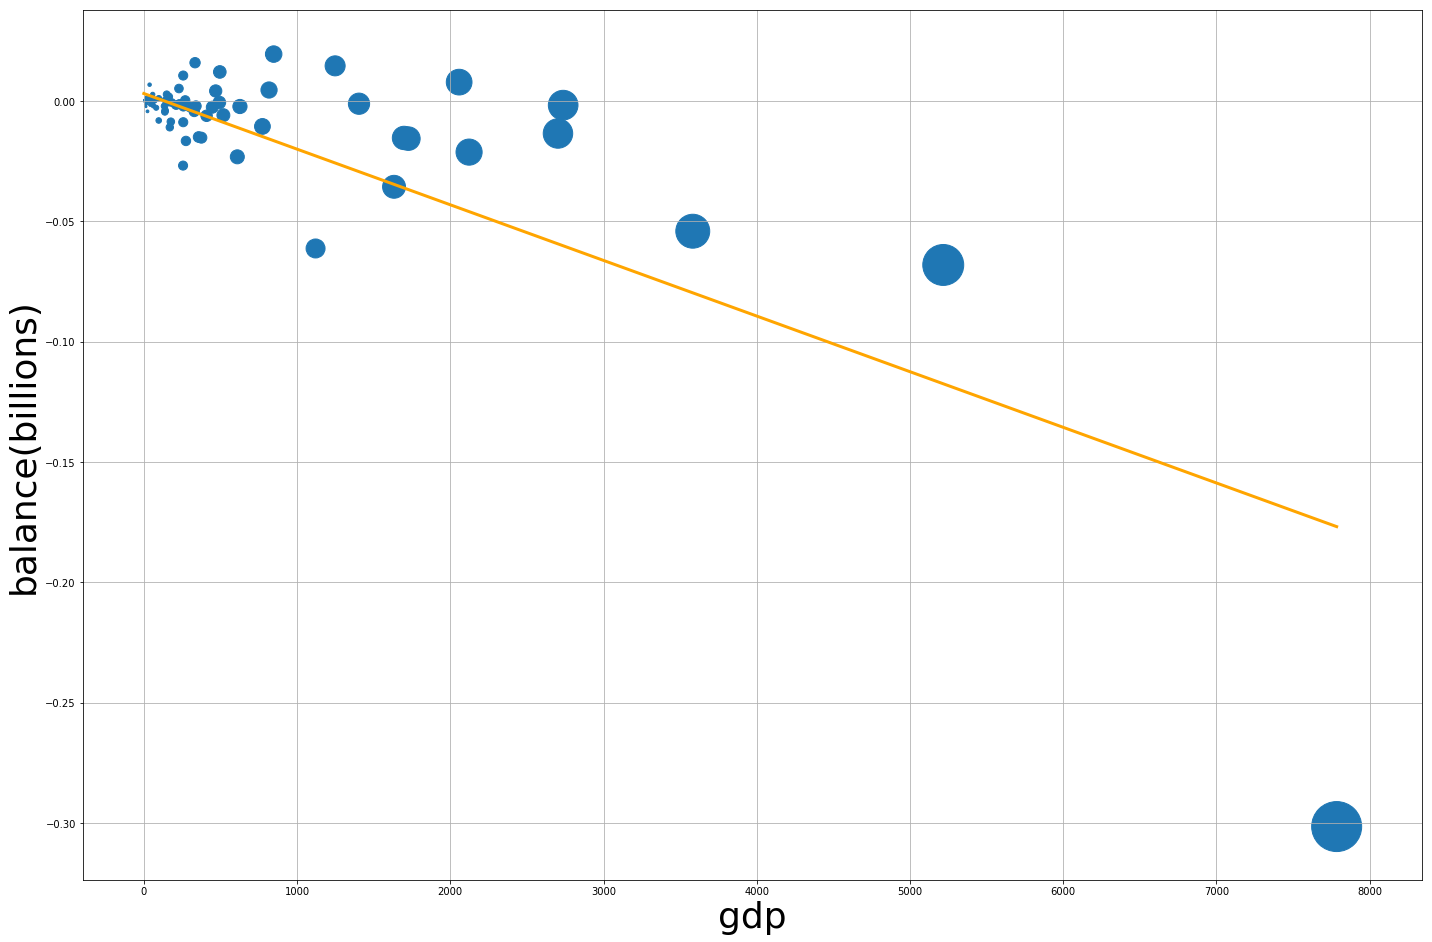

In [736]:

# merged_df.plot.scatter(x='mean gdp',
#                        y='mean export',
#                        c='DarkBlue')



x_axis= np.array(merged_df['mean gdp'])/10**12

y_axis=np.array(merged_df['mean balance'])/10**9


max_x = max(x_axis)
max_y = max(y_axis)


(slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

print(f'R^2 value is {rvalue**2}')
print(f'p value is {pvalue}')

fig, ax = plt.subplots(1,1,figsize=(24,16))




ax.plot(x_axis,fit
        ,'orange'
        ,linewidth=3)

ax.scatter( x_axis
           ,y_axis
           ,s=2500*x_axis/max_x
          )

#plt.tick_params(axis='both', which='major', labelsize=20)

ax.set_xlabel("gdp",fontsize=36)
ax.set_ylabel("balance(billions)",fontsize=18*2)
ax.grid()
plt.show()

In [664]:
import plotly.graph_objs as go

trace = go.Scatter(
    x = x_axis,
    y = y_axis,
    mode = 'markers'
)
trace2 = go.Scatter(
                  x=x_axis,
                  y=fit,
                  mode='lines',
                  name='Fit'
                  )
data = [trace,trace2]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')